# 20/12/2023 Geometric Random Variable for Job Vacancies in the UK

**"Jobs vacancies per 100 emp jobs" is a term used to describe the ratio of available job openings to the total number of employed individuals within a specific population in this case the Uk population, usually represented as a percentage. So, for every 100 people currently employed, it shows how many job openings exist.**

The data comes from the UK Office for National Statistics (ONS): 👇🏼 👇🏼 👇🏼https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/timeseries/ap2z/lms

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
vacancies_ratio = pd.read_excel("uk_jobs_vacancies.xls") # here we extract the data from and excel file

# Cleaning and organizing the data

In [48]:
vacancies_ratio.head(10) # looks like we are interested in the data from the 7th row

,Title,UK Job Vacancies ratio per 100 emp jobs - Total
0,CDID,AP2Z
1,Source dataset ID,LMS
2,PreUnit,NaN
3,Unit,NaN
4,Release date,12-12-2023
5,Next release,16 January 2024
6,Important notes,NaN
7,2001 MAY,2.6
8,2001 JUN,2.5
9,2001 JUL,2.5


In [49]:
# we are going to use a shorter name for the column of vacancies
vacancies_ratio = vacancies_ratio.rename(columns = {"UK Job Vacancies ratio per 100 emp jobs - Total": "vacancies"})

In [50]:
vacancies_ratio = vacancies_ratio.loc[7:, :]

In [51]:
vacancies_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 7 to 276
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      270 non-null    object
 1   vacancies  270 non-null    object
dtypes: object(2)
memory usage: 4.3+ KB


**We have non null data in our dataframe, however we need to convert the vacancies column into float numbers.**

In [53]:
vacancies_ratio["vacancies"] = vacancies_ratio["vacancies"].astype(float)

In [217]:
vacancies_ratio["vacancies"].describe() # let's see the five figure summary

count    270.000000
mean       2.385185
std        0.574814
min        1.100000
25%        2.025000
50%        2.300000
75%        2.600000
max        4.100000
Name: vacancies, dtype: float64

**Plotting a boxplot**

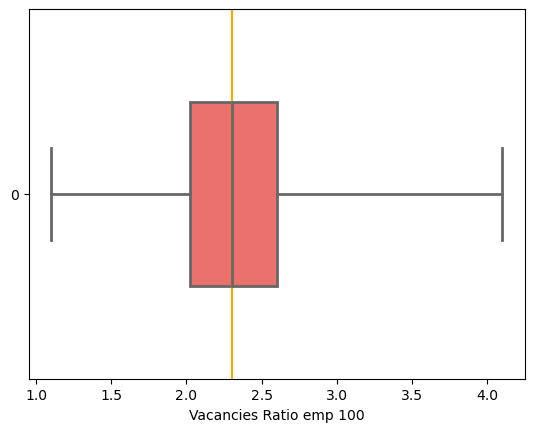

In [103]:
sns.boxplot(data = vacancies_ratio["vacancies"].describe().loc["min": "max"], 
            orient = "h", width = 0.5, linewidth = 2, whis = 5, color = "#ff5e57")

plt.xlabel("Vacancies Ratio emp 100")
plt.axvline(vacancies_ratio["vacancies"].describe().loc["50%"], color = "#ffa801")

plt.show()

In [95]:
IQR = vacancies_ratio["vacancies"].describe().loc["75%"] - vacancies_ratio["vacancies"].describe().loc["25%"]

In [97]:
IQR

0.5750000000000002

**IQR This is the interquatile range of the data, it is very similar to the mean of the vacancies ratio per 100 employees in this particular dataset**

# Applying our Geometric Random Variable

 Geometric random variables work better we they have these features:
 
 + Each trial must be independent
 + Each trial must be called success or failure
 + Probability of success on each trial remains constant
 + We run N trials until we get a success
 
1. Independent Trials:
 
+ Yes: Job vacancies ratio with a positive return per month from the previous one can be considered independent trials if factors like previous applications, skills, or market conditions don't significantly influence subsequent outcomes. However, if these factors have a strong influence, the independence assumption might be violated.

2. Success/Failure:

+ Yes: You can define "success" as positive return and "failure" as negative return. This clearly fulfills the criterion.

3. Constant Probability:

+ Partially: The geometric random variable assumes a constant probability of success (positive return per month) across all trials. However, in reality, the job vacancy ratio (your chosen success probability) might fluctuate slightly month-to-month or depending on specific sectors/skills. Therefore, the probability wouldn't be perfectly constant but could be considered an approximation within a reasonable range.

4. N Trials until Success:

+ Yes: This approach aligns with the geometric model by running trials (monthly reports of jobs vacancies ratio) until achieving a success (positive return from the previous month).

Success & Failure Definition:

1. Define success as finding a job in a month where the percentage change in the **"jobs vacancies per 100 emp jobs" ratio is positive** (indicating more vacancies and potentially easier job search).

2. Define failure as not finding a job in a month with a **negative percentage change** (fewer vacancies and potentially tougher job search).

**let's plot a line graph to display the time series data**

We need to organize the data to convert the string column of Title in a datetime object

In [108]:
vacancies_ratio["Title"].head() # we just convert the months into numbers and swap the years and months

7     2001 MAY
8     2001 JUN
9     2001 JUL
10    2001 AUG
11    2001 SEP
Name: Title, dtype: object

In [126]:
months = {"JAN": "01", "FEB": "02", "MAR": "03", "APR": "04", "MAY": "05", "JUN": "06", "JUL": "07",
         "AUG": "08", "SEP": "09", "OCT": "10", "NOV": "11", "DIC": "12"}

In [150]:
vacancies_ratio["months"] = vacancies_ratio["Title"].str[-3: ]

In [153]:
vacancies_ratio["months"] = vacancies_ratio["months"].map(months)

In [169]:
vacancies_ratio["year"] = vacancies_ratio["Title"].str[0: 4]

In [170]:
vacancies_ratio["time_series"] = vacancies_ratio["months"] + " " + vacancies_ratio["year"]

In [171]:
vacancies_ratio.head()

,Title,vacancies,months,year,time_series
7,2001 MAY,2.6,05,2001,05 2001
8,2001 JUN,2.5,06,2001,06 2001
9,2001 JUL,2.5,07,2001,07 2001
10,2001 AUG,2.5,08,2001,08 2001
11,2001 SEP,2.4,09,2001,09 2001


In [173]:
pd.to_datetime(vacancies_ratio["time_series"], format = "%m %Y").head()

7    2001-05-01
8    2001-06-01
9    2001-07-01
10   2001-08-01
11   2001-09-01
Name: time_series, dtype: datetime64[ns]

In [174]:
time_series = pd.to_datetime(vacancies_ratio["time_series"], format = "%m %Y")

**Now that we have a time series data object we are going to plot a line chart**

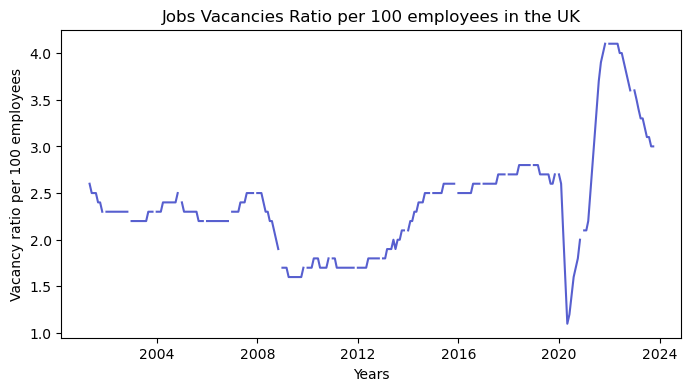

In [187]:
plt.figure(figsize = (8, 4))
plt.plot(time_series, vacancies_ratio["vacancies"], color = "#575fcf")
plt.title("Jobs Vacancies Ratio per 100 employees in the UK")
plt.xlabel("Years")
plt.ylabel("Vacancy ratio per 100 employees")
plt.show()

**Modeling the monthly change in job vacancies as a percentage of the previous month's ratio can be a valuable indicator for a geometric random variable model in the UK context**

In [190]:
vacancies_ratio["vacancies"].pct_change()

7           NaN
8     -0.038462
9      0.000000
10     0.000000
11    -0.040000
         ...   
272   -0.030303
273   -0.031250
274    0.000000
275   -0.032258
276    0.000000
Name: vacancies, Length: 270, dtype: float64

In [204]:
pct_change_month = vacancies_ratio["vacancies"].pct_change()

**How many positive changes from this ratio do we have?** 

In [205]:
len(pct_change_month[pct_change_month > 0])

42

**How many negative changes from this ratio do we have**

In [211]:
len(pct_change_month[pct_change_month <= 0]) 

# zero or less than 0 because in reality we are going to see a success if we have a positive change between months
# and we are going to have a failure if it happens anything else including not having a positive change between months

227

**We need to see the probability we are going to have a positive change in this dataset, this will be our success**

In [209]:
len(pct_change_month[pct_change_month > 0]) / len(vacancies_ratio) 

0.15555555555555556

**Since we divided the total number of positive changes per months we have between the total number of changes per month we can say that the probability of obtaining a positive month is 0.15 or 0.16, 15% almost 16%**

# But what is the probability we have at least 3 months until we get a positive change from the previous month? 

In [216]:
P_3 = 0.15 * ((1 - 0.15) ** 2) # here we applied the formula for the geometric random variable just for three trials-months
P_3

0.10837499999999999

**What is the probability we are going to have more than 3 months before having a success where we can see a postive change of the job vacancy ratio per 100 employees?**

In [213]:
P_2 = 0.15 * ((1 - 0.15) ** 1)
P_1 = 0.15 * ((1 - 0.15) ** 0)

In [215]:
P_greater_3 = 1 - (P_2 + P_1)
P_greater_3

0.7225

**When calculating probability of more than something to the infinitfe it would be difficult to calculate it so we take advantage of the fact that every distribution adds to 1**

# Conclusion

**It is less likely to have a positive change of this ratio in the Uk up until the third month because we have 0.108 around of 11% chances of this scenario to happen, However, it is going to take us at least 3 or more trials (months) to get a positive change from this ratio due to the fact that we have 72% chances of having a positive change per month after the third trial or month.**